#  Versuchdaten, Datenframe erstellen und anschauen

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
df = pd.read_csv("data_Heli.csv")

### Datenframe anschauen

In [46]:
df

,b,l,y
0,7.0,7,7.00
1,7.0,7,5.68
2,7.0,7,5.90
3,7.0,7,5.95
4,7.0,7,6.59
5,3.5,2,3.63
6,3.5,2,4.46
7,3.5,2,4.69
8,3.5,2,4.00
9,3.5,2,4.50


In [47]:
df.describe()

,b,l,y
count,25.000000,25.000000,25.000000
mean,7.000000,7.000000,4.711600
std,3.195048,4.564355,0.862248
min,3.500000,2.000000,3.630000
25%,3.500000,2.000000,4.190000
50%,7.000000,7.000000,4.460000
75%,10.500000,12.000000,4.770000
max,10.500000,12.000000,7.000000


## Plotten
### Data Plot

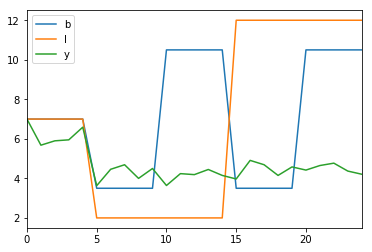

In [48]:
df.plot()

###  Boxplot

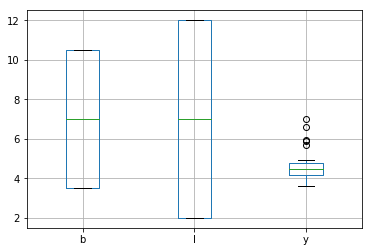

In [49]:
df.boxplot()


### 3D Scatter Plot

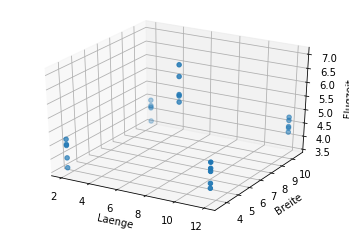

In [50]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.l, df.b, df.y)
threedee.set_xlabel('Laenge')
threedee.set_ylabel('Breite')
threedee.set_zlabel('Flugzeit')
plt.show()

# Ein einfaches Lineares Regressions Model

In [51]:
from sklearn import linear_model 
# Create linear regression object - between b and y 
regr = linear_model.LinearRegression() 

x= df.iloc[:,0:1]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 
print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)


Koeffizienten: 
 [-0.007]

Intercept: 4.760600000000001


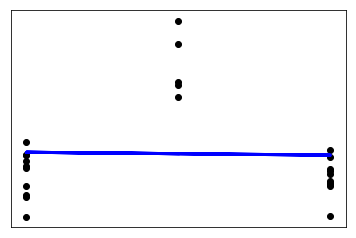

In [52]:

import matplotlib.pyplot as plt
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [53]:
from sklearn import linear_model 
# Create linear regression object - between l and y
regr = linear_model.LinearRegression() 

x= df.iloc[:,1:2]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 
print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)

Koeffizienten: 
 [0.0277]

Intercept: 4.5177000000000005


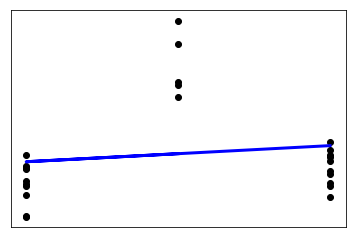

In [54]:

import matplotlib.pyplot as plt
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

x= df.iloc[:,0:2]
y= df.iloc[:,2]

x= x.values
y=y.values

### Das linear model benötigt numPy arrays, daher formen wir unsere Daten um, X zu einem 2-dimensionalen 25x2, bzw. Y zu 25, eindimensional

In [56]:
x.shape

(25, 2)

In [57]:
y.shape

(25,)

### Model Fitten

In [58]:
model = LinearRegression().fit(x, y)

### Model Parameter und Anpassungsgüte betrachten

In [59]:
print('intercept:', model.intercept_)


intercept: 4.566700000000001


In [60]:
print('slope:', model.coef_)

slope: [-0.007   0.0277]


In [61]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.02217354422962181


### Model nutzen um Werte vorherzusagen

In [62]:
yPred= model.predict(x)

# Fortgeschritten: Statsmodel package, zahlreiche Statistiken

In [63]:
import statsmodels.api as sm

In [64]:
x = sm.add_constant(x)

In [65]:
model = sm.OLS(y, x)

In [66]:
results = model.fit()

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.2494
Date:                Mon, 04 Nov 2019   Prob (F-statistic):              0.781
Time:                        10:01:40   Log-Likelihood:                -30.978
No. Observations:                  25   AIC:                             67.96
Df Residuals:                      22   BIC:                             71.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5667      0.518      8.820      0.0